# Unsupervised Learning

All algorithms presented in Chapters 5 to 9 belong to the larger class of supervised learning tools. Such tools seek to unveil a mapping between predictors $\textbf{X}$ and a label $\textbf{Z}$. The supervision comes from the fact that it is asked that the data tries to explain this particular variable $\textbf{Z}$. Another important part of machine learning consists of unsupervised tasks, that is, when $\textbf{Z}$ is not specified and the algorithm tries to make sense of $\textbf{X}$ on its own. Often, relationships between the components of $\textbf{X}$ are identified. This field is much too vast to be summarized in one book, let alone one chapter. The purpose here is to briefly explain in what ways unsupervised learning can be used, especially in the data pre-processing phase.

## The problem with correlated predictors

Often, it is tempting to supply all predictors to a ML-fueled predictive engine. That may *not* be a good idea when some predictors are highly correlated. To illustrate this, the simplest example is a regression on two variables with zero mean and covariance and precisions matrices:
$$\boldsymbol{\Sigma}=\textbf{X}'\textbf{X}=\begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix},  \quad \boldsymbol{\Sigma}^{-1}=\frac{1}{1-\rho^2}\begin{bmatrix} 1 & -\rho \\ -\rho & 1 \end{bmatrix}$$

When the covariance/correlation $\rho$ increase towards 1 (the two variables are co-linear), the scaling denominator in $\boldsymbol{\Sigma}^{-1}$ goes to 0 and the formula $\hat{\boldsymbol{\beta}}=\boldsymbol{\Sigma}^{-1}\textbf{X}'\textbf{Z}$ implies that one coefficient will be highly positive and one highly negative. The regression creates a spurious arbitrage between the two variables which is very inefficient and yields disastrous results out-of-sample.

We illustrate what happens when many variables are used in the regression below. One elucidation of the aforementioned phenomenon comes from the variables `Mkt_Cap_12M_Usd` and `Mkt_Cap_6M_Usd`, which have a correlation of 99.6% in the training sample. Both are singled out as highly significant but their signs are contradictory. Moreover, the magnitude of their coefficients are very close (0.21 versus 0.18) so that their net effect cancels out. Naturally, providing the regression with only one of these two inputs would have been wiser.

In [20]:
import pandas as pd
import numpy as np

data_ml = pd.read_pickle('./data/data_ml.pkl')
separation_date = pd.to_datetime('2014-01-15')

training_sample = data_ml[data_ml['date'] < separation_date]
test_sample = data_ml[data_ml['date'] > separation_date]
features = data_ml.columns[2:95]
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

In [21]:
import statsmodels.api as sm

fit_lm = sm.OLS(training_sample['R1M_Usd'], sm.add_constant(training_sample[features])).fit()

In [22]:
result_table = fit_lm.summary2().tables[1]
result_table[result_table['t'].abs() > 3]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.040574,0.005343,7.594323,3.107512e-14,0.030103,0.051046
Ebitda_Margin,0.013237,0.003493,3.789999,1.506925e-04,0.006392,0.020083
Ev_Ebitda,0.006814,0.002256,3.020213,2.526288e-03,0.002392,0.011237
Fa_Ci,0.007231,0.002347,3.081471,2.060090e-03,0.002632,0.011830
Fcf_Bv,0.025054,0.005131,4.882465,1.048492e-06,0.014996,0.035111
Fcf_Yld,-0.015893,0.003736,-4.254127,2.099628e-05,-0.023215,-0.008571
Mkt_Cap_12M_Usd,0.204738,0.027432,7.463476,8.461142e-14,0.150972,0.258504
Mkt_Cap_6M_Usd,-0.179780,0.045939,-3.913443,9.101987e-05,-0.269819,-0.089740
Mom_5M_Usd,-0.018669,0.004431,-4.212972,2.521442e-05,-0.027354,-0.009984
Mom_Sharp_11M_Usd,0.017817,0.004695,3.795131,1.476096e-04,0.008616,0.027019


In fact, there are several indicators for the market capitalization and maybe only one would suffice, but it is not obvious to tell which one is the best choice.

To further depict correlation issues, we compute the correlation matrix of the predictors below (on the training sample). Because of its dimension, we show it graphically.

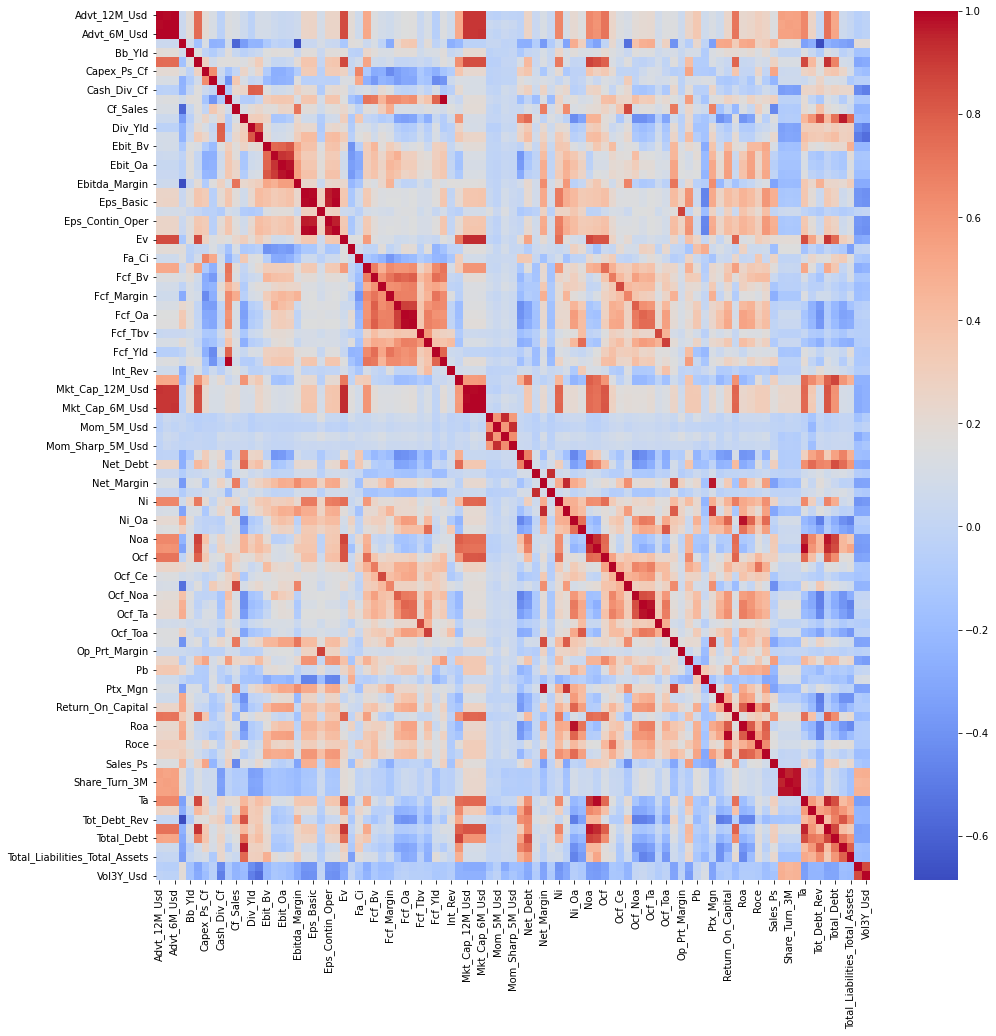

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
sns.heatmap(training_sample[features].corr(), cmap='coolwarm')
plt.show()

The graph of Figure 15.1 reveals several hot squares around the diagonal. These local correlation patterns occur several times in the dataset and explain why it is not a good idea to use simple regression with this set of features.

In full disclosure, **multicollinearity** (when predictors are correlated) can be *much less a problem* for ML tools than it is for pure statistical inference. In statistics, one central goal is to study the properties of $\beta$ coefficients. Collinearity perturbs this kind of analysis. In machine learning, the aim is to maximize out-of-sample accuracy. If having many predictors can be helpful, then so be it. What does matter is that the large spectrum of features helps improve the generalization ability of the model. Their collinearity is irrelevant.

In the remainder of the chapter, we present two approaches that help reduce the number of predictors:

- The first one aims at *creating new variables* uncorrelated with each other but sacrifices interpretablity;
- The second one gathers predictors into *homogeneous clusters* and only one feature should be chosen out of this cluster. Here the rationale is reversed: interpretability is favored over statistical properties because the resulting set of features may still include high correlations.

## Principal Component Analysis (PCA) and Autoencoders

The first method is a cornerstone in *dimensionality reduction*. It seeks to determine a smaller number of factors $(K'<K)$ such that:

- i) The level of explanatory power remains as high as possible;
- ii) The resulting factors are linear combinations of the original variables;
- iii) The resulting factors are orthogonal.

### A bit of algebra

We work with matrices for the derivation of PCA. An $I \times K$ matrix $\textbf{X}$ is orthonormal if $I>K$ and $\textbf{X}'\textbf{X}=\textbf{I}_K$. When $I=K$, the (square) matrix is called orthogonal and $\textbf{X}'\textbf{X}=\textbf{X}\textbf{X}'=\textbf{I}_K$, i.e., $\textbf{X}^{-1}=\textbf{X}'$.

One foundational result in matrix theory is the *Singular Value Decomposition* (SVD, see, e.g., chapter 5 in Meyer (2000)). The SVD is formulated as follows: any $I\times K$ matrix $\textbf{X}$ can be decomposed into $$\textbf{X}=\textbf{U}\boldsymbol{\Delta}\textbf{V}'$$
where $\textbf{U}(I\times I)$ and $\textbf{V}(K\times K)$ are orthogonal and $\boldsymbol{\Delta} (I\times K)$ is diagonal ($\Delta_{i,k}=0$ whenever $i=k$). In addition, $\Delta_{i,i}\geq 0$: the diagonal terms of $\boldsymbol{\Delta}$ are non-negative.

For simplicity, we assume below that $\textbf{1}_I'\textbf{X}=\textbf{0}_K'$, i.e., that all columns have zero sum (and hence zero mean).[^1] This allows to write that the covariance matrix is equal to its sample estimate $\boldsymbol{\Sigma}_X=\frac{1}{I-1} \textbf{X}'\textbf{X}$.

One crucial feature of covariance matrices is their symmetry. Indeed, real-valued symmetric (square) matrices enjoy a SVD which is much more powerful: when $\textbf{X}$ is symmetric, there exist an orthogonal matrix $\textbf{Q}$ and a diagonal matrix $\textbf{D}$ such that
$$\textbf{X}=\textbf{Q}\textbf{DQ}'$$
This process is called **diagonalization** (see chapter 7 in Meyer (2000)) and conveniently applies to covariance matrices.

[^1]: In practice, this is not a major problem; since we work with features that are uniformly distributed, de-meaning amounts to remove 0.5 to all feature values.

### PCA

The goal of PCA is to build a dataset $\tilde{\textbf{X}}$ that has fewer columns but that keeps as much information as possible when compressing the original one $\textbf{X}$. The key notion is the **change of base**, which is a linear transformation of $\textbf{X}$ into $\textbf{Z}$, a matrix with identical dimension, via $$\textbf{Z}=\textbf{XP}$$
where $\textbf{P}$ is a $K\times K$ matrix. There are of course an infinite number of ways to transform $\textbf{X}$ into $\textbf{Z}$, but two fundamental constraints help reduce the possibilities:

- The first constraint is that the columns of $\textbf{Z}$ be *uncorrelated*: they tell different stories and have zero redundancy.
- The second constraint is that the *variance* of the columns of $\textbf{Z}$ is highly *concentrated*. This means that a few factors (columns) will capture most of the explanatory power (signal), while most (the others) will consist predominantly of noise. 

All of this is coded in the covariance matrix of $\textbf{Y}$:

- The first condition imposes that the covariance matrix be *diagonal*;
- The second condition imposes that the diagonal elements, when ranked in decreasing magnitude, see their value decline (sharply if possible).

The covariance matrix of $\textbf{Z}$ is $$\boldsymbol{\Sigma}_Y=\frac{1}{I-1}\textbf{Z}'\textbf{Z}=\frac{1}{I-1}\textbf{P}'\textbf{X}'\textbf{XP}=\frac{1}{I-1}\textbf{P}'\boldsymbol{\Sigma}_X\textbf{P}$$
In this expression, we plug the decomposition of $\boldsymbol{\Sigma}_X$:
$$\boldsymbol{\Sigma}_Y=\frac{1}{I-1}\textbf{P}'\textbf{Q}\textbf{DQ}'\textbf{P}$$
thus picking $\textbf{P}=\textbf{Q}$, we get, by orthogonality, $\boldsymbol{\Sigma}_Y=\frac{1}{I-1}\textbf{D}$, that is, a diagonal covariance matrix for $\textbf{Z}$. The columns of $\textbf{Z}$ can then be re-shuffled in decreasing order of variance so that the diagonal elements of $\boldsymbol{\Sigma}_Y$ progressively shrink. This is useful because it helps locate the factors with most informational content (the first factors). In the limit, a constant vector (with zero variance) carries no signal.

The matrix $\textbf{Z}$ is a linear transformation of $\textbf{X}$, thus, it is expected to carry the same information, even though this information is coded differently. Since the columns are ordered according to their relative important, it is simple to omit some of them. The new set of features $\tilde{\textbf{X}}$ consists in the first $K'$ (with $K'<K$) columns of $\textbf{Z}$.

Below, we show how to perform PCA and visualize the output with the `sklearn` package. To ease readability, we use the smaller sample with few predictors.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(training_sample[features_short])
print("Explained variances ratios:")
print(pca.explained_variance_ratio_)

pd.DataFrame(pca.components_.T, index=features_short, columns=['PC' + str(i) for i in range(1, len(features_short) + 1)])

Explained variances ratios:
[0.35718238 0.1940806  0.15561321 0.10434453 0.09601422 0.07017118
 0.02259388]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Div_Yld,-0.271599,0.579099,0.045725,-0.528956,0.226626,0.506566,0.032012
Eps,-0.420407,0.150082,-0.024767,0.337373,-0.771377,0.301883,0.011965
Mkt_Cap_12M_Usd,-0.523868,-0.343239,0.172289,0.062495,0.252781,0.002987,0.714319
Mom_11M_Usd,-0.047238,-0.057714,-0.897160,0.241015,0.250559,0.258477,0.043179
Ocf,-0.532947,-0.195890,0.185039,0.234371,0.357596,0.049015,-0.676866
Pb,-0.152413,-0.580806,-0.221048,-0.682136,-0.308665,0.038675,-0.168799
Vol1Y_Usd,0.406890,-0.381139,0.282162,0.155411,0.061575,0.762588,0.008632


The rotation gives the matrix $\mathbb{P}$: it's the tool that changes the base. The first row of the output indicates that the standard deviation of each new factor (column). Each factor is indicated via a PC index (principal component). Often, the first PC loads positively (or simutaneously negatively) on all initial features: a convex weighted average of all predictors is expected to carry a lot of information. The second PC is an arbitrage between price-to-book and dividend yield. The third is contrarian as it loads heavily (and negatively) on momentum. Not all principal components are easy to interpret.

Sometimes, it can be useful to visualize the way the principal components are built. In the following Figure 15.2, we show one popular representation that is used for two factors (usually the first two) with the aid of the python package `pca`.

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


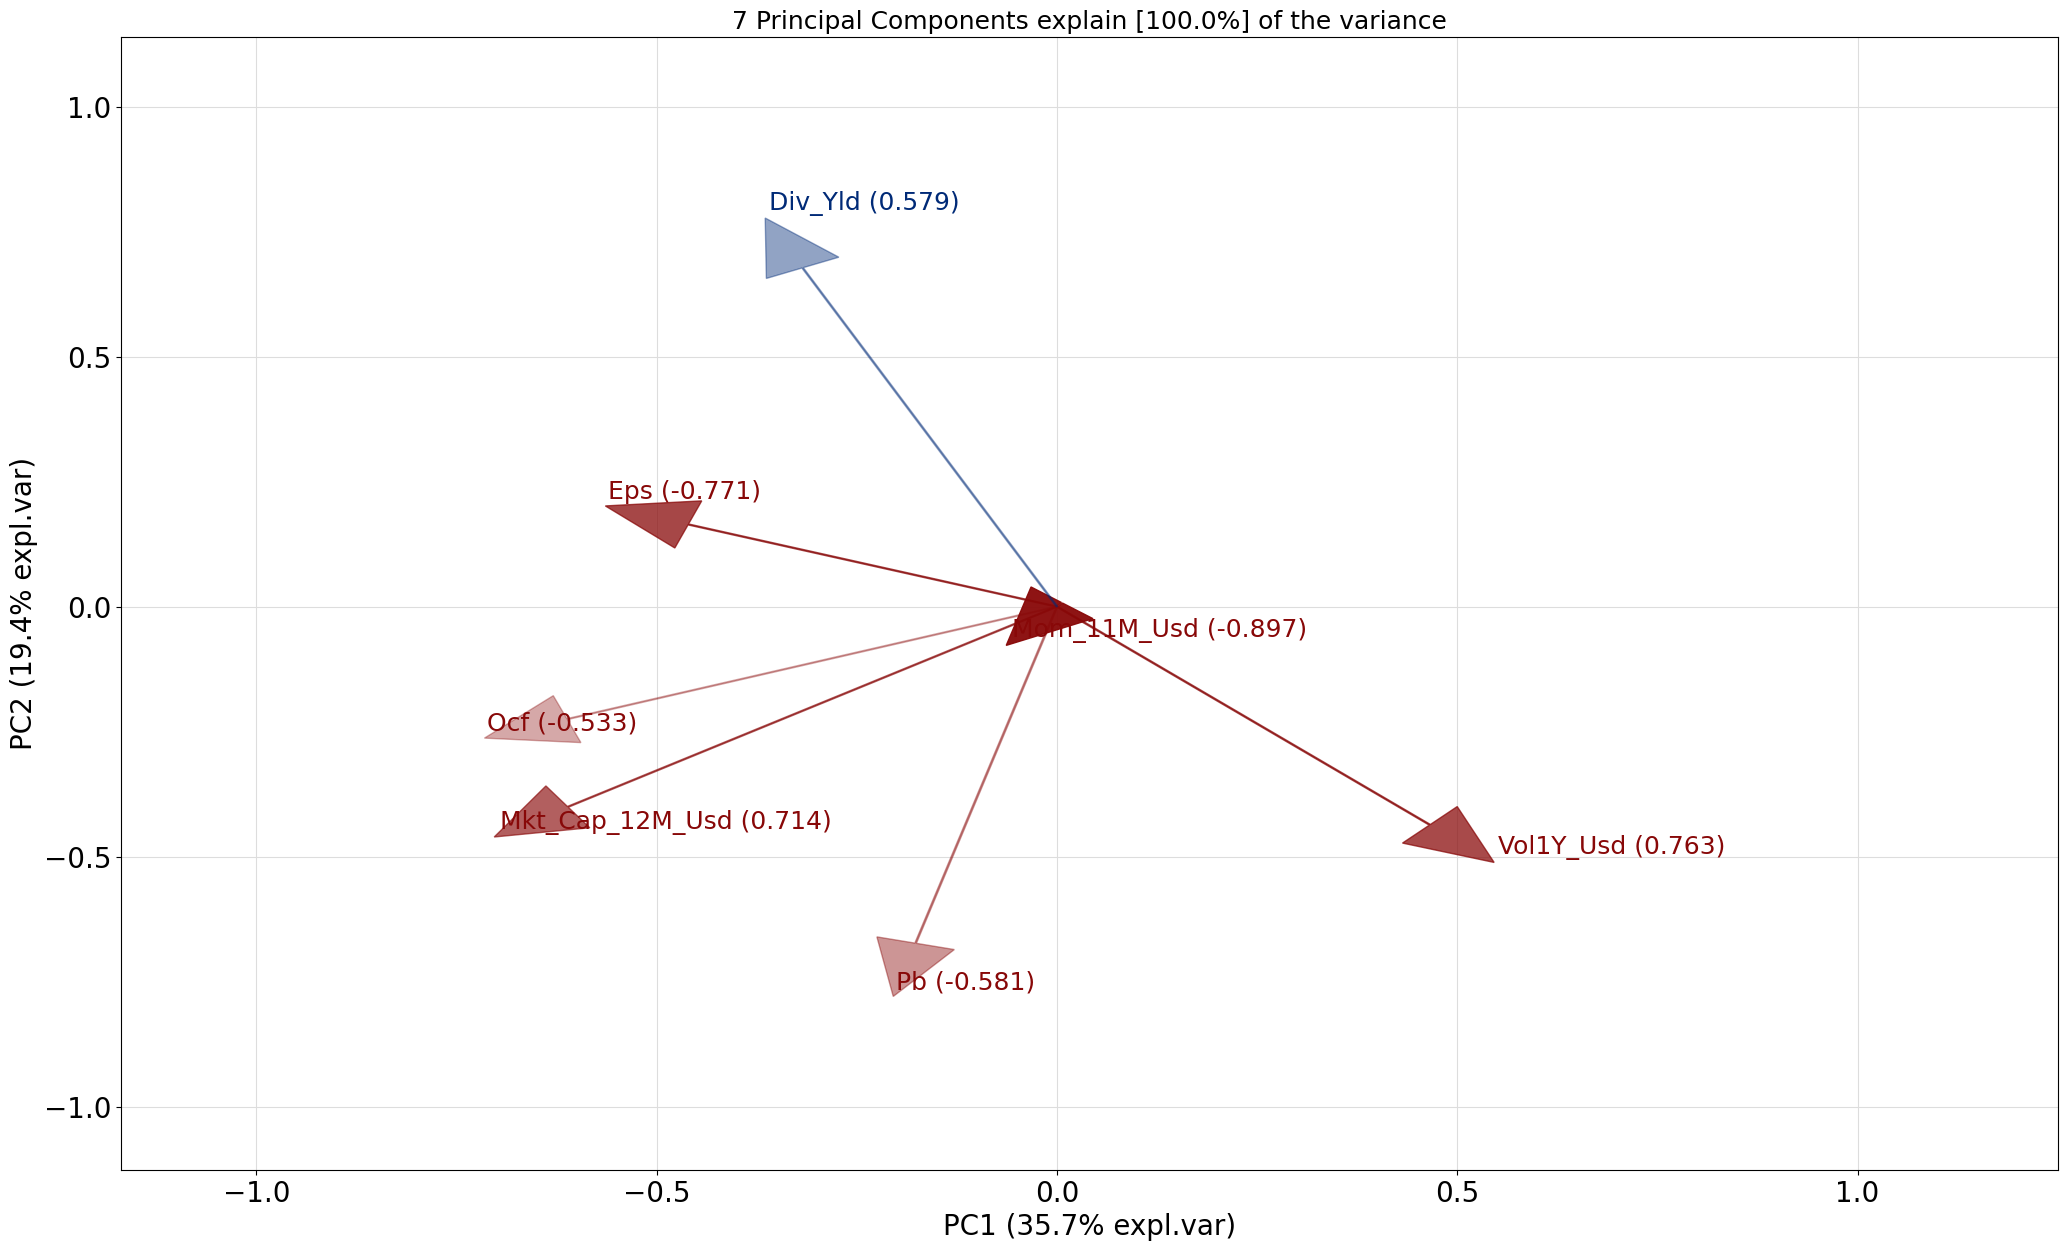

In [ ]:
from pca import pca

fit_pca = pca(n_components=7)
fit_pca.fit_transform(training_sample[features_short])

fit_pca.biplot(n_feat=7, PC=[0, 1], cmap=None)
plt.show()

The numbers indicated along the axes are the proportion of explained variance of each PC. Compared to the figures in the first line of the output, the numbers are squared and then divided by the total sum of squares.

Once the rotation is known, it is possible to select a subsample of the transformed data. From the original 7 features, it is easy to pick just 4.

In [ ]:
from sklearn.decomposition import PCA

fit_pca_sklearn = PCA()
fit_pca_sklearn.fit(training_sample[features_short])
pd.DataFrame(np.dot(training_sample[features_short], fit_pca_sklearn.components_.T[:, :4]), columns=['PC1', 'PC2', 'PC3', 'PC4']).head()

,PC1,PC2,PC3,PC4
0,-0.398967,-0.757813,-0.139152,0.313258
1,-0.428470,-0.758727,-0.401643,0.374525
2,-0.521530,-0.567912,-0.105339,0.257495
3,-0.544536,-0.533562,-0.088339,0.228179
4,-0.567264,-0.533975,-0.060924,0.232094


These 4 factors can then be used as orthogonal features in any ML engine. The fact that the features are *uncorrelated* is undoubtedly an asset. But the price of this convenience is high: the features are no longer immediately interpretable. De-correlating the predictors adds yet another layer of “blackbox-ing” in the algorithm.

PCA can also be used to estimate factor models. In $\textbf{Z}=\textbf{XP}$, it suffices to replace $\textbf{Z}$ with returns, $\textbf{X}$ with factor values and $\textbf{P}$ with factor loadings. Most recently, Lettau and Pelger (2020a) and Lettau and Pelger (2020b) propose a thorough analysis of PCA estimation techniques. They notably argue that first moments of returns are important and should be included in the objective function, alongside the optimization on the second moments.

We end this subsection with a technical note. Usually, PCA is performed on the *covariance* matrix of returns. Sometimes, it may be preferable to decompose the **correlation** matrix. The result may adjust substantially if the variables have very different variances (which is not really the case in the equity space). If the investment universe encompasses several asset classes, then a correlation-based PCA will reduce the importance of the most volatile class. In this case, it is as if all returns are scaled by their respective volatilities.

### Autoencoders

In PCA, the coding from $\textbf{X}$ to $\textbf{Z}$ is straightforward, linear and works in both ways:
$$\textbf{Z}=\textbf{X}\textbf{P} \quad \text{and} \quad \textbf{X}=\textbf{YP}'$$
so that we recover $\textbf{X}$ from $\textbf{Z}$. This can be written differently:
$$\textbf{X} \quad \overset{\text{encode via }\textbf{P}}{\longrightarrow} \quad \textbf{Z} \quad \overset{\text{decode via } \textbf{P}'}{\longrightarrow} \quad \textbf{X}$$
If we take the truncated version and seek a smaller output (with only $K'$ columns), this gives
$$\textbf{X}, \ (I\times K) \quad \overset{\text{encode via }\textbf{P}_{K'}}{\longrightarrow} \quad \tilde{\textbf{X}}, \ (I \times K') \quad \overset{\text{decode via } \textbf{P}'_{K'}}{\longrightarrow} \quad \breve{\textbf{X}},\ (I \times K)$$
where $\textbf{P}_{K'}$ is the restriction of $\textbf{P}$ to the $K'$ columns that correspond to the factors with the largest variances. The dimensions of matrices are indicated inside the brackets. In this case, the recoding cannot recover $\textbf{P}$ exactly but only an approximation, which we write $\breve{\textbf{X}}$. This approximation is coded with less information, hence this new data $\breve{\textbf{X}}$ is *compressed* and provides a parsimonious representation of the original sample $\textbf{X}$.

An autoencoder generalizes this concept to nonlinear coding functions. Simple linear autoencoders are linked to latent factor models (see Proposition 1 in for the case of single layer autoencoders.) The scheme is the following
$$\textbf{X},\ (I\times K) \quad \overset{\text{encode via } N} {\longrightarrow} \quad \tilde{\textbf{X}}=N(\textbf{X}), \ (I \times K') \quad \overset{\text{decode via } N'}{\longrightarrow} \quad \breve{\textbf{X}}=N'(\tilde{\textbf{X}}), \ (I \times K)$$
where the encoding and decoding functions $N$ and $N'$ are often taken to be neural networks. The term **autoencoder** comes from the fact that the target output, which we often write $\textbf{Z}$ is the original sample $\textbf{X}$. Thus, the algorithm seeks to determine the function that *minimizes the distance* (to be defined) between $\textbf{X}$ and output value $\breve{\textbf{X}}$. The encoder generates an alternative representation of $\textbf{X}$, whereas the decoder tries to recode it back to its original values. Naturally, the intermediate (coded version) $\breve{\textbf{X}}$ is targeted to have a smaller dimension compared to $\textbf{X}$.

### Application

Autoencoders are easy to code in `Keras` (see Chapter 7 for more details). We will use the functional API to code a NN. For simplicity, we work with the small number of predictors (7). The structure of the network consists of two symmetric networks with only one intermediate layer containing 32 units. The activation function is sigmoid; this makes sense since the input has values in the unit interval.

In [25]:
from keras.layers import Input, Dense
from keras.models import Model
import keras.backend as K

input_layer = Input(shape=(7, ))
x = input_layer
x = Dense(32, activation='sigmoid')(x)
encoder = Dense(4)(x)

encoder = Dense(32, activation='sigmoid')(encoder)
decoder = Dense(7)(encoder)

model = Model(inputs=input_layer, outputs=decoder)
model.compile(
    loss='mse', 
    optimizer='Adam',
    metrics=['mae']
)

In the training part, we optimize the MSE and use an Adam update of the weights. 

Finally, we are ready to train the data onto itself! The evolution of loss on the training and testing samples is depicted in the following figure. The decreasing pattern shows the progress of the quality in compression.

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
 dense_2 (Dense)             (None, 32)                160       
                                                                 
 dense_3 (Dense)             (None, 7)                 231       
                                                                 
Total params: 779
Trainable params: 779
Non-trainable params: 0
_________________________________________________________________


In [26]:
from plot_keras_history import plot_history

fit_ae = model.fit(
    training_sample[features_short],
    training_sample[features_short],
    epochs=15, batch_size=512,
    validation_data=(
        test_sample[features_short], 
        test_sample[features_short]
    )
)

Epoch 1/15
387/387 [==============================] - 4s 4ms/step - loss: 0.0796 - mae: 0.2346 - val_loss: 0.0471 - val_mae: 0.1740
Epoch 2/15
387/387 [==============================] - 1s 3ms/step - loss: 0.0333 - mae: 0.1411 - val_loss: 0.0257 - val_mae: 0.1225
Epoch 3/15
387/387 [==============================] - 2s 4ms/step - loss: 0.0206 - mae: 0.1076 - val_loss: 0.0179 - val_mae: 0.0995
Epoch 4/15
387/387 [==============================] - 2s 4ms/step - loss: 0.0170 - mae: 0.0969 - val_loss: 0.0168 - val_mae: 0.0961
Epoch 5/15
387/387 [==============================] - 2s 4ms/step - loss: 0.0163 - mae: 0.0938 - val_loss: 0.0164 - val_mae: 0.0932
Epoch 6/15
387/387 [==============================] - 2s 4ms/step - loss: 0.0161 - mae: 0.0917 - val_loss: 0.0163 - val_mae: 0.0914
Epoch 7/15
387/387 [==============================] - 1s 4ms/step - loss: 0.0160 - mae: 0.0903 - val_loss: 0.0162 - val_mae: 0.0902
Epoch 8/15
387/387 [==============================] - 1s 3ms/step - loss: 0.

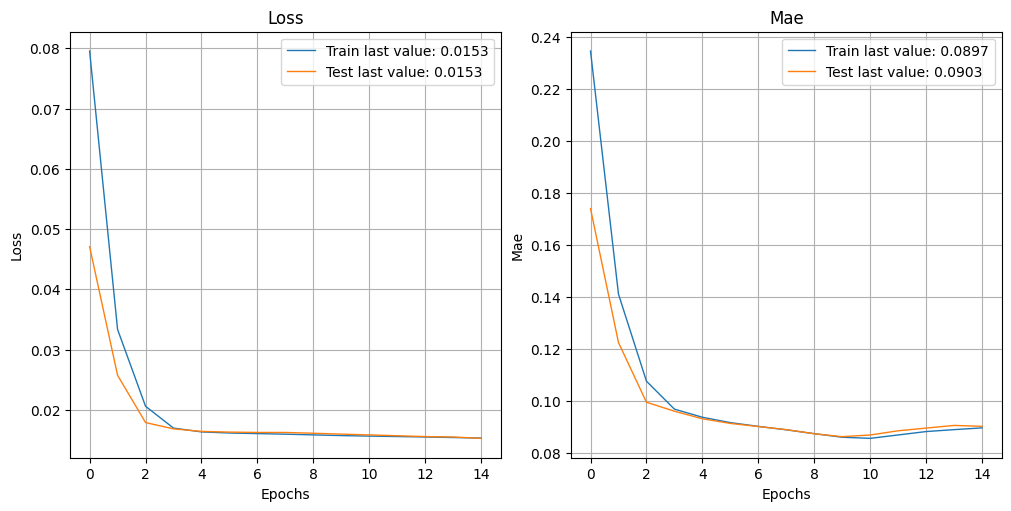

In [27]:
from plot_keras_history import show_history
show_history(fit_ae)

In order to get the details of all weights and biases, the syntax is the following.

In [28]:
ae_weights = model.get_weights()

Retrieving the encoder and processing the data into the compressed format is just a matter of matrix manipulation. In practice, it is possible to build a submodel by loading the weights from the encoder (see exercise below).

## Clustering via K-means

The second family of unsupervised tools pertains to *clustering*. Features are grouped into homogeneous families of predictors. It is then possible to single out one among the group (or to create a synthetic average of all of them). Mechanically, the number of predictors is reduced.

The principle is simple: among a group of variables (the reasoning would be the same for observations in the other dimension) $\textbf{x}_{1\leq j \leq J}$, find the combination of $k<J$ groups that minimize
$$\sum_{i=1}^k\sum_{\textbf{x}\in S_i}||\textbf{x}-\textbf{m}_i||^2$$
where $||\cdot||$ is some norm which is usually taken to be the Euclidean $l^2$-norm. The $S_i$ are the groups and the minimization is run on the whole set of groups $\textbf{S}$. The $\textbf{m}_i$ are the group means (also called *centroids* or *barycenters*): $\textbf{m}_i=(\text{card}(S_i))^{-1}\sum_{\textbf{x}\in S_i}\textbf{x}$.

In order to ensure optimality, all possible arrangements must be tested, which is prohibitively long when $k$ and $J$ are large. Therefore, the problem is usually solved with greedy algorithms that seek (and find) solutions that are not optimal but 'good enough'.

One heuristic way to proceed is the following:

1. Start with a (possibly random) partition of $k$ clusters.
2. For each cluster, compute the optimal mean values $\textbf{m}_i^*$ that minimizes expression. This is a simple quadratic program.
3. Given the optimal centers $\textbf{m}_i^*$, reassign the points $\textbf{x}_i$ so that they are all the closest to their center.
4. Repeat steps 2. and 3. until the points do not change cluster at step 3.
   
Below, we illustrate this process with an example. From all 93 features, we build 10 clusters.

In [9]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=10, n_init='auto')
k_means.fit(training_sample[features].T)

clusters = pd.DataFrame([features, k_means.labels_], index=["factor", "cluster"]).T
clusters[clusters['cluster'] == 2]

,factor,cluster
3,Asset_Turnover,2
21,Eps_Basic_Gr,2
25,Ev_Ebitda,2
54,Ni_Oa,2
68,Op_Prt_Margin,2
70,Pb,2
73,Recurring_Earning_Total_Assets,2
74,Return_On_Capital,2
76,Roa,2
77,Roc,2


We single out the fourth cluster which is composed mainly of accounting ratios related mainly to EPS. Given these 10 clusters, we can build a much smaller group of features that can then be fed to the predictive engines described in Chapters 5 to 9. The representative of a cluster can be the member that is closest to the center, or simply the center itself. This pre-processing step can nonetheless cause problems in the forecasting phase. Typically, it requires that the training data be also clustered. The extension to the testing data is not straightforward (the clusters may not be the same).

## Nearest Neighbors

To the best of our knowledge, nearest neighbors are *not* used in large-scale portfolio choice applications. The reason is simple: *computational cost*. Nonetheless, the concept of neighbors is widespread in unsupervised learning and can be used locally in complement to interpretability tools. Theoretical results on k-NN relating to bounds for error rates on classification tasks can be found in section 6.2 of Ripley (2007). The rationale is the following. If:

1. The training sample is able to accurately span the distribution of $(\textbf{y},\textbf{X})$; **and**
2. The testing sample follows the *same* distribution as the training sample (or close enough);

Then the neighbourhood of one instance $\textbf{x}_i$ from the testing featreus computed on the training sample will yield valuable information on $y_i$.

In what follows, we thus seek to find neighbors of one particular instance $\textbf{x}_i$ (a $K$-dimensional row vector). Note that there is a major difference with the previous section: the clustering is intended at the *observation* level (row) and not at the predictor level (column).

Given a dataset with the same (corresponding) columns $\textbf{X}_{i,k}$, the neighbors are defined via a similarity measure (or distance)
$$D(\textbf{x}_j,\textbf{x}_i)=\sum_{k=1}^Kc_k d_k(x_{j,k},x_{i,k})$$
where the distance functions $d_k$ can operate on various data types (numerical, categorical, etc.). For numerical values, $d_k(x_{j,k}, x_{i,k})=(x_{j,k}-x_{i,k})^2$ or $d_k(x_{j,k}, x_{i,k})=|x_{j,k}-x_{i,k}|$. For categorical values, we refer to  the exhaustive survey by Boriah, Chandola, and Kumar (2008) which lists 14 possible measures. Finally the $c_k$ allow some flexibility by weighting measures. This is useful because both raw values ($x_{i,k}$ versus $x_{i,k'}$) or measure outputs ($d_k$ versus $d_{k'}$) can have different scales.

Once the distances are computed over the whole sample, they are ranked using indices $l_1^i,\dots,l_I^i$:
$$D\left(\textbf{x}_{l_1^i},\textbf{x}_i\right) \le D\left(\textbf{x}_{l_2^i},\textbf{x}_i\right) \le \dots, \le D\left(\textbf{x}_{l_I^i},\textbf{x}_i\right)$$

The nearest neighbors are those indexed by $l_m^i$ for $m=1,\dots,k$. We leave out the case when there are problematic equalities of the type $D\left(\textbf{x}_{l_m^i},\textbf{x}_i\right)=D\left(\textbf{x}_{l_{m+1}^i},\textbf{x}_i\right)$ for the sake of simplicity and because they rarely occur in practice as long as there are sufficiently many numerical predictors.

Given these neighbors, it is now possible to build a prediction for the label side $y_i$. The rationale is straightforward: if $\textbf{x}_i$ is close to other instances $\textbf{x}_j$, then the label value $y_i$ should also be close to $y_j$ (under the assumption that the features carry some predictive information over the label $y$).

An intuitive prediction for $y_i$ is the following weighted average:
$$\hat{y}_i=\frac{\sum_{j\neq i} h(D(\textbf{x}_j,\textbf{x}_i)) y_j}{\sum_{j\neq i} h(D(\textbf{x}_j,\textbf{x}_i))}$$
where $h$ is a decreasing function. Thus, the further $\textbf{x}_j$ is from $\textbf{x}_i$, the smaller the weight in the average. A typical choice is $h(z)=e^{-az}$ for some parameter $a>0$ that determines how penalizing the distance $D(\textbf{x}_j,\textbf{x}_i)$ is. Of course, the average can be taken in the set of $k$ nearest neighbors, in which case the $h$ is equal to zero beyond a particular distance threshold:
$$\hat{y}_i=\frac{\sum_{j \text{ neighbor}} h(D(\textbf{x}_j,\textbf{x}_i)) y_j}{\sum_{j \text{ neighbor}} h(D(\textbf{x}_j,\textbf{x}_i))}$$
A more agnostic rule is to take $h:=1$ over the set of neighbors and in this case, all neighbors have the same weight. For classification tasks, the procedure involves a voting rule whereby the class with the most votes wins the contest, with possible tie-breaking methods. The interested reader can have a look at the short survey in Bhatia et al. (2010).

For the choice of optimal $k$, several complicated techniques and criteria exist (see, e.g., Ghosh (2006) and Hall et al. (2008)). Heuristic values often do the job pretty well. A rule of thumb is that $k=\sqrt{I}$ ($I$ being the total number of instances) is not too far from the optimal value, unless $I$ is exceedingly large.

Below, we illustrate this concept. We pick one date (31th of December 2006) and single out one asset (with stock_id equal to 13). We then seek to find the $k=30$ stocks that are the closest to this asset at this particular date. We will continue to resort to the `sklearn` package. 

In [10]:
from sklearn.neighbors import NearestNeighbors

knn_data = data_ml[data_ml['date'] == '2006-12-31']
knn_target = knn_data[knn_data['stock_id'] == 13][features]
knn_sample = knn_data[knn_data['stock_id'] != 13][features]
neighbors = NearestNeighbors(n_neighbors=30, n_jobs=-1)
neighbors.fit(knn_sample)

NearestNeighbors(n_jobs=-1, n_neighbors=30)

In [12]:
neighbors.kneighbors(knn_target, 30)[1][0]

array([ 904,  875,  729,  547, 1035,  500,  334,  116,  788,   53,  617,
        129,  341,  359,  672,  152,  264,  857,  829,  285, 1149,  165,
        945,  191,  339,  161,  950,  375,  784,    1], dtype=int64)

Once the neighbors and distances are known, we can compute a prediction for the return of the target stock. We use the function $h(z)=e^{-z}$ for the weighting of instances.

In [15]:
from sklearn.neighbors import KNeighborsRegressor

weights_function = lambda x: np.exp(-x)
fit_knn_regressor = KNeighborsRegressor(30, weights=weights_function)
fit_knn_regressor.fit(knn_sample, knn_data[knn_data['stock_id'] != 13]['R1M_Usd'])

KNeighborsRegressor(n_neighbors=30,
                    weights=<function <lambda> at 0x00000222ADA2A8C0>)

In [19]:
fit_knn_regressor.predict(knn_target)[0], knn_data[knn_data['stock_id'] == 13]['R1M_Usd'].values[0]

(0.03636731312624231, 0.089)

The prediction is neither very good, nor very bad (the sign is correct!). However, note that this example cannot be used for predictive purposes because we use data from 2006-12-31 to predict a return at the same date. In order to avoid the forward-looking bias, the `knn_sample` variable should be chosen from a prior point in time.

The above computations are fast (a handful of seconds at most), but hold for only one asset. In a $k$-NN exercise, each stock gets a customed prediction and the set of neighbors must be re-assessed each time. For $N$ assets, $N(N-1)/2$ distances must be evaluated. This is particularly *costly* in a backtest, especially when several parameters can be tested (the number of neighbors $k$ or $a$ in the weighting function $h(z)=e^{-az}$). When the investment universe is small (when trading indices for instance), $k$-NN methods become computationally attractive (see for instance Chen and Hao (2017)).

## Coding Exercise

Code the compressed version of the data (narrow training sample) via the encoder part of the autoencoder.

In [29]:
model.save_weights('./models/autoencoder_weights.h5')

In [30]:
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoder_model.load_weights('./models/autoencoder_weights.h5', skip_mismatch=True, by_name=True)
encoder_model.compile(
    loss='mse',
    optimizer='Adam',
    metrics=['mae']
)

In [31]:
encoder_model.predict_on_batch(training_sample[features_short])

array([[0.32461667, 0.69813424, 0.48692712, ..., 0.10308014, 0.41212717,
        0.59466714],
       [0.3481856 , 0.6648091 , 0.45105785, ..., 0.06401528, 0.43180168,
        0.6072334 ],
       [0.38025203, 0.6507643 , 0.48428643, ..., 0.14395556, 0.38990664,
        0.56758124],
       ...,
       [0.41130975, 0.5508394 , 0.49103728, ..., 0.1727788 , 0.5677421 ,
        0.54895216],
       [0.39041862, 0.5650211 , 0.4949579 , ..., 0.10555072, 0.57148325,
        0.5646937 ],
       [0.40988845, 0.5447226 , 0.49742228, ..., 0.12064968, 0.5698912 ,
        0.5538498 ]], dtype=float32)

## Takeaways

*Unsupervised learning*: no label specification and simply tries to make sense of $\textbf{X}$ on its own.

- The problem with correlated predictors
  - For linear regression: 'arbitrage' between features
  - For ML tools, **multicollinearity** is not a serious problem since statistical inference is not required but out-of-sample accuracy is pursued.
- Principal Component Analysis (PCA) and Autoencoders
  - PCA has 3 characteristics
    1. Results have *high explanation power*;
    2. Results are *linear combinations* of the original features;
    3. Results are *orthogonal*.
  - Definitions for orthogonal, SVD and **diagonalization** for symmetric square matrices
  - PCA: find a matrix $\textbf{Z}=\textbf{XP}$ with uncorrelated columns and concentrated variances (columns reshuffled for the most informational principle components)
  - PCA can add the '*blackboxing*' in the algorithm
  - PCA can also be applied to estimate factor models
  - Usually performed on the **covariance** matrix, but if volatilities are omitted, **correlation** matrix can be used
  - Autoencoders: **nonlinear** coding functions to *compress* data into an alternative representation with most information
- Clustering via K-means
  - To reduce the number of predictors
  - Find a combination of a smaller number of groups that minimize the total sum of distances to the cluster center
  - A greedy algorithm might be used to find 'good enough' solutions
  - EM algorihm, iteratively
- Nearest Neighbors
  - Usually not used in large-scale portfolio choice applications for high computational cost
  - Neighbors are defined via a similarity measure and a (weighted) average of distances
  - Use nearest neighbors for prediction (a weighted average of the labels for the NNs)
  - Weight function: $h(z):=1$ or $h(z)=e^{-az}$
  - Choices for $k$: a rule of thumb for $k=\sqrt{I}$ (number of instances)
  - Usage recommendation: small universe